## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
cat_cols = []
for col in (df.dtypes.index):
    if df[col].dtype == 'object':
        cat_cols.append(col)

In [7]:
for x in cat_cols:
    print(x)
    print(df[x].value_counts())
    print()

Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Officer             1
Bacchus Marsh       1
Plumpton            1
Croydon South       1
Attwood             1
Name: Suburb, Length: 314, dtype: int64

Address
5 Margaret St         3
1/1 Clarendon St      3
14 Arthur St          3
13 Robinson St        3
53 William St         3
                     ..
45 Browns Rd          1
127 Tucker Rd         1
3 Victoria St         1
19 Luntar Rd          1
14/52 Leicester St    1
Name: Address, Length: 13378, dtype: int64

Type
h    9449
u    3017
t    1114
Name: Type, dtype: int64

Method
S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

SellerG
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Weast               1
Boutique            1
Coventry            1
Upper               1
Metro          

In [8]:
df.shape

(13580, 21)

## Preprocessing the dataset

#### Fill missing values

In [9]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
#Replacing building area with mean of the particular building type
null_arr = df['BuildingArea'].isnull()
for i, v in enumerate(df['Type']):
    if null_arr[i]:
        df['BuildingArea'][i] = np.mean(df['BuildingArea'][df['Type']==v])
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
car_slots_mode = df.pivot_table(values='Car', columns='Type', aggfunc=(lambda x: x.mode()[0]))
car_slots_mode

Type,h,t,u
Car,2.0,2.0,1.0


In [12]:
miss_bool = df['Car'].isnull()
df.loc[miss_bool, 'Car'] = df.loc[miss_bool, 'Type'].apply(lambda x: car_slots_mode[x])

In [13]:
council_area_mode = {}
for v in df['Suburb'].unique():
    mode = df['CouncilArea'][df['Suburb']==v].mode()
    if len(mode)==0:
         council_area_mode[v] = df['CouncilArea'].mode()[0]
    else:
        council_area_mode[v] = df['CouncilArea'][df['Suburb']==v].mode()[0]
council_area_mode

{'Abbotsford': 'Yarra',
 'Airport West': 'Moonee Valley',
 'Albert Park': 'Port Phillip',
 'Alphington': 'Darebin',
 'Altona': 'Hobsons Bay',
 'Altona North': 'Hobsons Bay',
 'Armadale': 'Stonnington',
 'Ascot Vale': 'Moonee Valley',
 'Ashburton': 'Boroondara',
 'Ashwood': 'Monash',
 'Avondale Heights': 'Moonee Valley',
 'Balaclava': 'Port Phillip',
 'Balwyn': 'Boroondara',
 'Balwyn North': 'Boroondara',
 'Bentleigh': 'Glen Eira',
 'Bentleigh East': 'Glen Eira',
 'Box Hill': 'Whitehorse',
 'Braybrook': 'Maribyrnong',
 'Brighton': 'Bayside',
 'Brighton East': 'Bayside',
 'Brunswick': 'Moreland',
 'Brunswick West': 'Moreland',
 'Bulleen': 'Manningham',
 'Burwood': 'Whitehorse',
 'Camberwell': 'Boroondara',
 'Canterbury': 'Boroondara',
 'Carlton North': 'Yarra',
 'Carnegie': 'Glen Eira',
 'Caulfield': 'Glen Eira',
 'Caulfield North': 'Glen Eira',
 'Caulfield South': 'Glen Eira',
 'Chadstone': 'Monash',
 'Clifton Hill': 'Yarra',
 'Coburg': 'Moreland',
 'Coburg North': 'Moreland',
 'Colling

In [14]:
miss_bool = df['CouncilArea'].isnull()
for i,v in enumerate(df['Suburb']):
    if miss_bool[i]:
        df['CouncilArea'][i] = council_area_mode[v]
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [15]:
#It will make more sense to replace missing values of year built with modal value of that suburb area  as we can 
#assume that Melbourne went into fast development phase during that time and because of this most of the houses were
#built during that time.

year_built_mode = {}
for v in df['Suburb'].unique():
    mode = df['YearBuilt'][df['Suburb']==v].mode()
    if len(mode)==0:
        year_built_mode[v] = df['YearBuilt'].mode()[0]
    else:
        year_built_mode[v] = df['YearBuilt'][df['Suburb']==v].mode()[0]
year_built_mode

{'Abbotsford': 1900.0,
 'Airport West': 1950.0,
 'Albert Park': 1890.0,
 'Alphington': 1930.0,
 'Altona': 1950.0,
 'Altona North': 1960.0,
 'Armadale': 1900.0,
 'Ascot Vale': 1900.0,
 'Ashburton': 1950.0,
 'Ashwood': 1950.0,
 'Avondale Heights': 1960.0,
 'Balaclava': 1960.0,
 'Balwyn': 1960.0,
 'Balwyn North': 1960.0,
 'Bentleigh': 1950.0,
 'Bentleigh East': 1950.0,
 'Box Hill': 1950.0,
 'Braybrook': 1950.0,
 'Brighton': 1970.0,
 'Brighton East': 1950.0,
 'Brunswick': 1890.0,
 'Brunswick West': 1970.0,
 'Bulleen': 1970.0,
 'Burwood': 1950.0,
 'Camberwell': 1960.0,
 'Canterbury': 1910.0,
 'Carlton North': 1970.0,
 'Carnegie': 1970.0,
 'Caulfield': 1960.0,
 'Caulfield North': 1960.0,
 'Caulfield South': 1970.0,
 'Chadstone': 2000.0,
 'Clifton Hill': 1890.0,
 'Coburg': 1920.0,
 'Coburg North': 1950.0,
 'Collingwood': 1900.0,
 'Doncaster': 1970.0,
 'Eaglemont': 1960.0,
 'Elsternwick': 1970.0,
 'Elwood': 1970.0,
 'Essendon': 1970.0,
 'Essendon North': 1970.0,
 'Fairfield': 1970.0,
 'Fitzroy

In [16]:
miss_bool = df['YearBuilt'].isnull()
for i,v in enumerate(df['Suburb']):
    if miss_bool[i]:
        df['YearBuilt'][i] = year_built_mode[v]
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [17]:
len(df['SellerG'].unique())

268

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [19]:
df['Date'].unique

<bound method Series.unique of 0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: Date, Length: 13580, dtype: object>

In [20]:
#convert date to posting year using regex
import re
p = re.compile("[0-9]{4}$")
# df['Date'][2079]
for i, v in enumerate(df['Date']):
    result = p.search(str(df['Date'][i]))
    df['Date'][i] = result.group(0)

In [21]:
df['Postcode'] = df['Postcode'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)
df['Date'] = df['Date'].astype(int)
df['YearBuilt'] = df['YearBuilt'].astype(int)
df['Propertycount'] = df['Propertycount'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  int64  
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  int64  
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  int64  
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [23]:
df.drop(columns=['Bedroom2', 'Address'], inplace = True)

## Creation of new attributes

In [24]:
#Convert year built to age
df['Age'] = 2021-df['YearBuilt']
df.drop(columns=['YearBuilt'], inplace=True)

In [25]:
df['AdAge'] = 2021-df['Date']
df.drop(columns=['Date'], inplace=True)

## Exploratory data analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

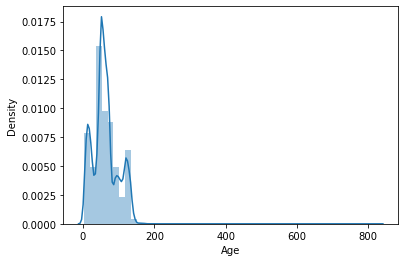

In [26]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

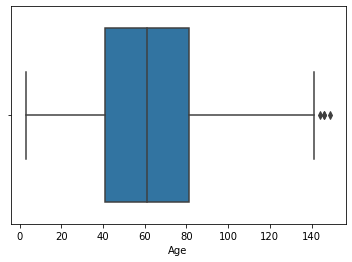

In [27]:
df = df[df['Age']<=150]
sns.boxplot(x = df['Age'])

In [28]:
df.shape

(13561, 19)

<AxesSubplot:xlabel='Age', ylabel='Density'>

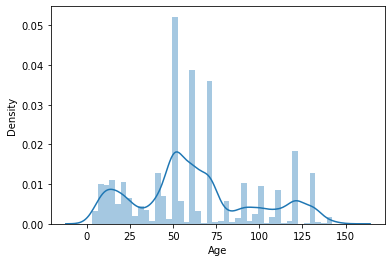

In [29]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='AdAge', ylabel='Density'>

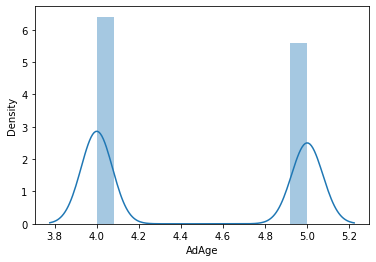

In [30]:
sns.distplot(df['AdAge'])

<AxesSubplot:xlabel='AdAge', ylabel='count'>

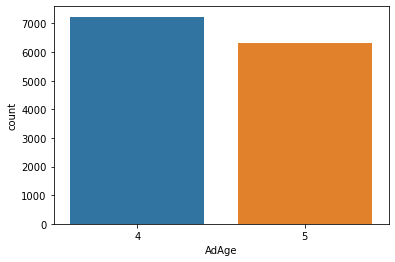

In [31]:
sns.countplot(df['AdAge'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

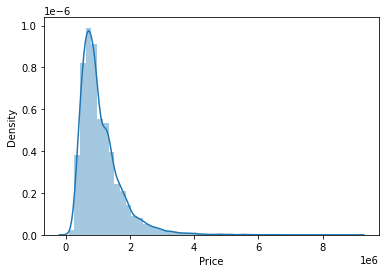

In [32]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

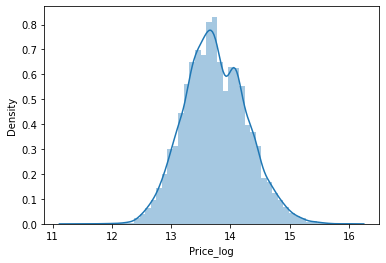

In [33]:
# We can change the graph for better result by using log transformation
df['Price_log'] = np.log(1+df['Price'])
sns.distplot(df['Price_log'])

In [34]:
# df.drop(columns = ['Price'], inplace=True)

In [35]:
import nltk
freq = nltk.FreqDist(df['SellerG'])
df_sg = pd.DataFrame({'SellerG': list(freq.keys()),
                 'Count': list(freq.values())})
df_sg.head()

,SellerG,Count
0,Biggin,392
1,Nelson,1562
2,Jellis,1315
3,Greg,237
4,LITTLE,35


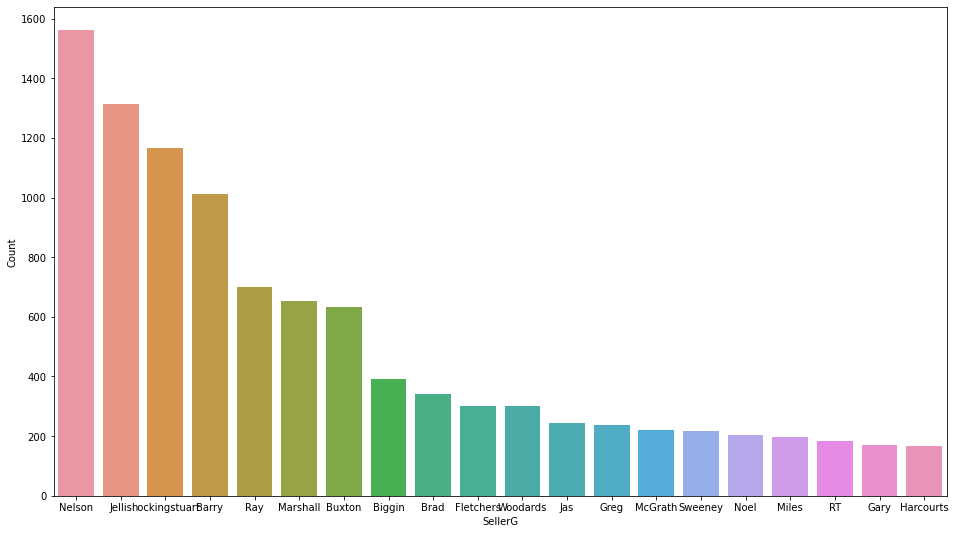

In [36]:
d = df_sg.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,9))
sns.barplot(data = d, x='SellerG', y='Count')
plt.show()

In [37]:
import nltk
freq = nltk.FreqDist(df['Suburb'])
df_sb = pd.DataFrame({'Suburb': list(freq.keys()),
                 'Count': list(freq.values())})
df_sb.head()

,Suburb,Count
0,Abbotsford,56
1,Airport West,67
2,Albert Park,69
3,Alphington,34
4,Altona,74


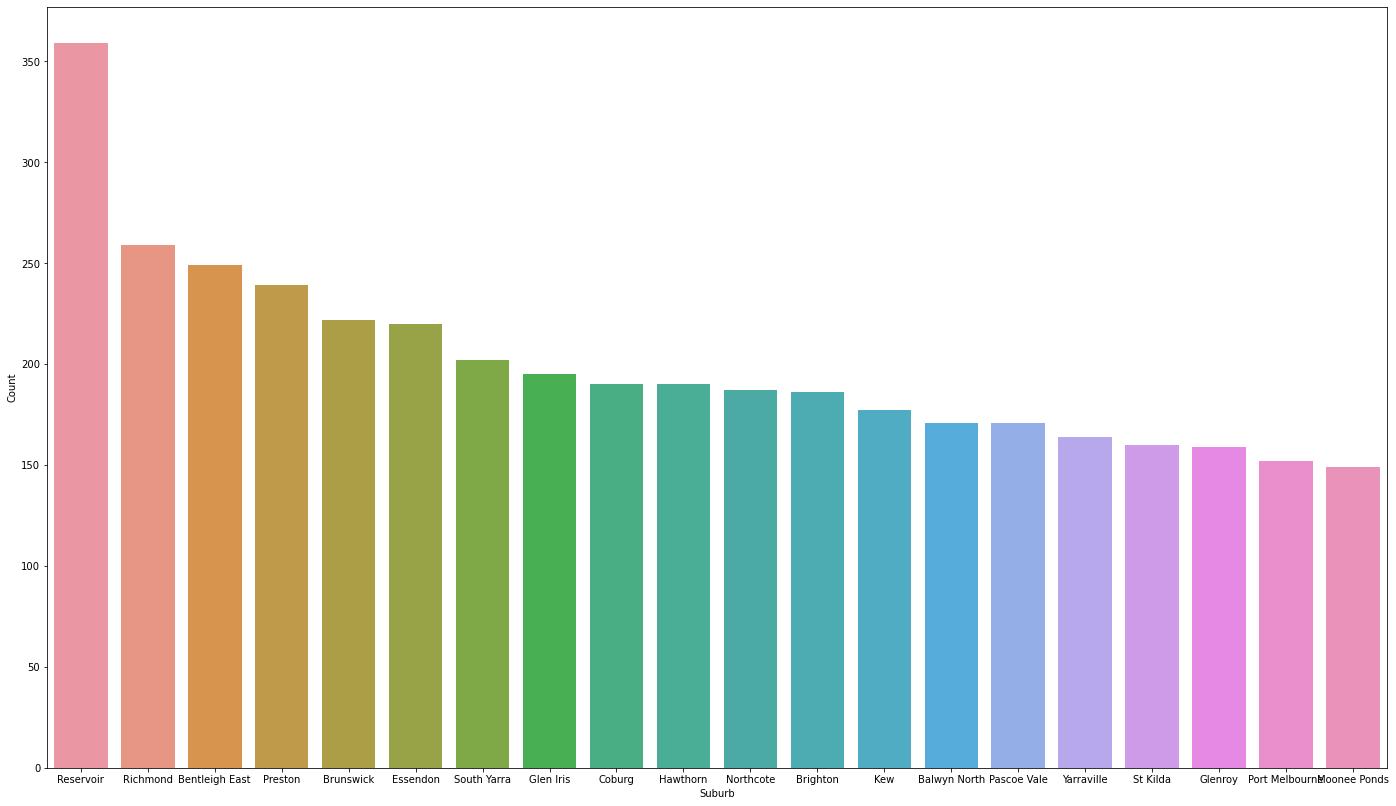

In [38]:
d = df_sb.nlargest(columns='Count', n=20)
plt.figure(figsize=(24,14))
sns.barplot(data = d, x='Suburb', y='Count')
plt.show()

## Correlation Matrix

<AxesSubplot:>

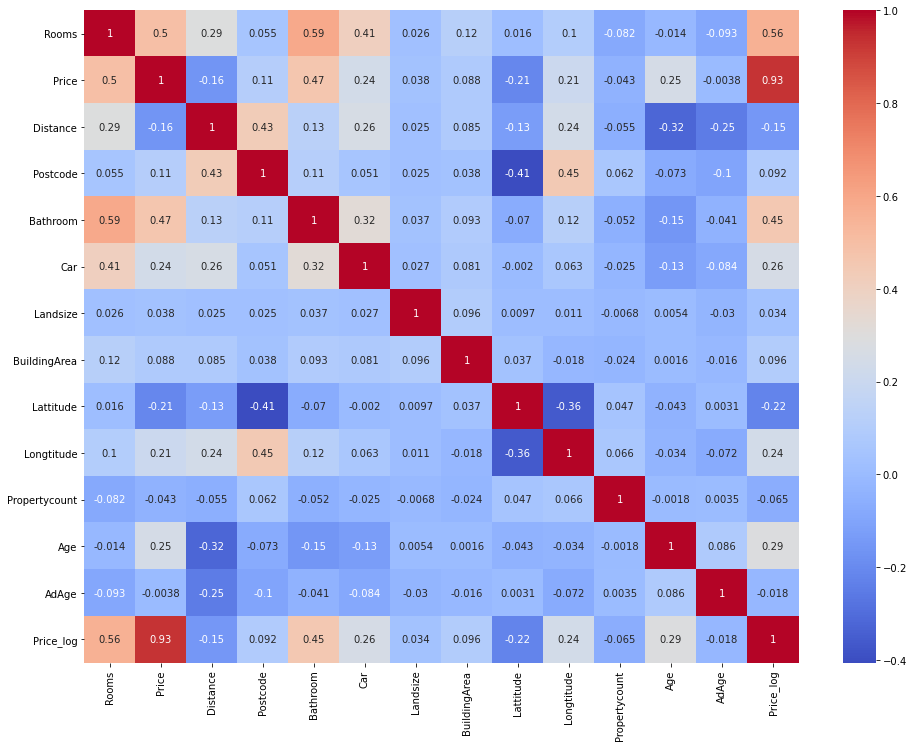

In [39]:
corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 10})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13561 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13561 non-null  object 
 1   Rooms          13561 non-null  int64  
 2   Type           13561 non-null  object 
 3   Price          13561 non-null  float64
 4   Method         13561 non-null  object 
 5   SellerG        13561 non-null  object 
 6   Distance       13561 non-null  float64
 7   Postcode       13561 non-null  int64  
 8   Bathroom       13561 non-null  int64  
 9   Car            13561 non-null  float64
 10  Landsize       13561 non-null  float64
 11  BuildingArea   13561 non-null  float64
 12  CouncilArea    13561 non-null  object 
 13  Lattitude      13561 non-null  float64
 14  Longtitude     13561 non-null  float64
 15  Regionname     13561 non-null  object 
 16  Propertycount  13561 non-null  int64  
 17  Age            13561 non-null  int64  
 18  AdAge 

## Onehot Encoding

In [41]:
df = pd.get_dummies(df, columns=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'])
df.shape

(13561, 645)

## Input Split

In [42]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude',
       ...
       'CouncilArea_Yarra', 'CouncilArea_Yarra Ranges',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=645)

In [43]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['Price_log', 'Price'])
y=df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 64, test_size=0.25)
x_train.shape

(10170, 643)

In [44]:
x_test.shape

(3391, 643)

## Model Training

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
pred = model.predict(x_test)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

-771392485591.5714

In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 28233581595.357067
Mean Squared Error: 2.913981027447926e+23
Root Mean Squared Error: 539813025727.2351


In [49]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [50]:
pred = model.predict(x_test)

In [51]:
r2_score(y_test, pred)

0.5964525375850993

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 235834.56649955767
Mean Squared Error: 152442455833.41992
Root Mean Squared Error: 390438.79908817966


In [53]:
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
model.fit(x_train, y_train)

ExtraTreeRegressor()

In [54]:
pred = model.predict(x_test)

In [55]:
r2_score(y_test, pred)

0.5658888838463059

In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 237009.94190504277
Mean Squared Error: 163988057947.48718
Root Mean Squared Error: 404954.38995952025


In [57]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)

Ridge()

In [58]:
pred = model.predict(x_test)

In [59]:
r2_score(y_test, pred)

0.6815442664591774

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 230395.61518189617
Mean Squared Error: 120298548787.01784
Root Mean Squared Error: 346840.8118820763


In [61]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train, y_train)

Lasso()

In [62]:
pred = model.predict(x_test)

In [63]:
r2_score(y_test, pred)

0.6649623893188763

In [64]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 231441.8825744845
Mean Squared Error: 126562451571.75807
Root Mean Squared Error: 355756.1687051373


In [65]:
df_new_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_new_lasso.head(10)

,Actual,Predicted
5811,392000.0,3.227740e+05
3949,1460000.0,8.603564e+05
4492,1820000.0,1.932008e+06
1477,1002000.0,1.304867e+06
11774,980000.0,9.400057e+05
6881,1300000.0,1.869757e+06
11070,720000.0,4.152926e+05
8044,1402000.0,1.692994e+06
2140,1400000.0,1.858196e+06
1505,1063000.0,1.047660e+06


In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
pred = model.predict(x_test)

In [68]:
r2_score(y_test, pred)

0.8097845640750733

In [69]:
df_new_for = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_new_for.head(10)

,Actual,Predicted
5811,392000.0,413680.0
3949,1460000.0,1233140.0
4492,1820000.0,1686490.0
1477,1002000.0,1527040.0
11774,980000.0,924969.0
6881,1300000.0,1468710.0
11070,720000.0,618230.0
8044,1402000.0,1652245.0
2140,1400000.0,1646405.0
1505,1063000.0,1089610.0


In [70]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 159031.03649969806
Mean Squared Error: 71855013079.00102
Root Mean Squared Error: 268057.85397745954


# We will now use price_log

In [71]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['Price_log', 'Price'])
y=df['Price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 64, test_size=0.25)
x_train.shape

(10170, 643)

In [72]:
x_test.shape

(3391, 643)

## Model Training

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [74]:
pred = model.predict(x_test)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

-126096870315.85062

In [76]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 9689.647776662408
Mean Squared Error: 34321160956.513462
Root Mean Squared Error: 185259.7121786425


In [77]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [78]:
pred = model.predict(x_test)

In [79]:
r2_score(y_test, pred)

0.729061687862269

In [80]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.20128940711517088
Mean Squared Error: 0.07374423644932063
Root Mean Squared Error: 0.2715589005157456


In [81]:
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
model.fit(x_train, y_train)

ExtraTreeRegressor()

In [82]:
pred = model.predict(x_test)

In [83]:
r2_score(y_test, pred)

0.7309193708225898

In [84]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.19806445125613156
Mean Squared Error: 0.07323861061001838
Root Mean Squared Error: 0.2706263302230926


In [85]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)

Ridge()

In [86]:
pred = model.predict(x_test)

In [87]:
r2_score(y_test, pred)

0.78159822642049

In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1785354844124958
Mean Squared Error: 0.0594447935573282
Root Mean Squared Error: 0.24381302991704157


In [89]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train, y_train)

Lasso()

In [90]:
pred = model.predict(x_test)

In [91]:
r2_score(y_test, pred)

0.09964810681744729

In [92]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.3853711507833722
Mean Squared Error: 0.24505859793167775
Root Mean Squared Error: 0.4950339361414304


In [93]:
df_new_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_new_lasso.head(10)

,Actual,Predicted
5811,12.879020,13.572181
3949,14.193948,13.579137
4492,14.414348,13.773804
1477,13.817510,13.741851
11774,13.795309,13.792420
6881,14.077876,13.734534
11070,13.487008,13.789107
8044,14.153411,13.808483
2140,14.151984,13.654063
1505,13.876607,13.729519


In [94]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [95]:
pred = model.predict(x_test)

In [96]:
r2_score(y_test, pred)

0.8740203799408203

In [97]:
df_new_for = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_new_for.head(10)

,Actual,Predicted
5811,12.879020,12.921484
3949,14.193948,14.033022
4492,14.414348,14.301165
1477,13.817510,14.196498
11774,13.795309,13.721480
6881,14.077876,14.200670
11070,13.487008,13.275970
8044,14.153411,14.301068
2140,14.151984,14.306059
1505,13.876607,13.896571


In [98]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1360318123608886
Mean Squared Error: 0.03428924767464053
Root Mean Squared Error: 0.1851735609492903


In [108]:
df_new_for = pd.DataFrame({'Actual': (np.e**y_test)-1, 'Predicted': (np.e**pred)-1})
df_new_for.head(10)

,Actual,Predicted
5811,392000.0,4.090045e+05
3949,1460000.0,1.242979e+06
4492,1820000.0,1.625237e+06
1477,1002000.0,1.463728e+06
11774,980000.0,9.102542e+05
6881,1300000.0,1.469848e+06
11070,720000.0,5.830148e+05
8044,1402000.0,1.625080e+06
2140,1400000.0,1.633210e+06
1505,1063000.0,1.084435e+06


In [109]:
y_test_al = (np.e**y_test)-1

In [110]:
pred_al = (np.e**pred)-1

In [115]:
df_new_for = pd.DataFrame({'Actual': y_test_al.astype(str), 'Predicted': pred_al.astype(str)})
df_new_for.head(10)

,Actual,Predicted
5811,391999.9999999997,409004.4986833556
3949,1459999.999999998,1242978.571049696
4492,1819999.999999999,1625236.8623673697
1477,1001999.999999999,1463727.5877862899
11774,979999.999999999,910254.2407179481
6881,1299999.9999999984,1469847.909168301
11070,719999.9999999991,583014.83198893
8044,1401999.9999999984,1625079.9998837097
2140,1399999.9999999995,1633210.0346804613
1505,1062999.9999999984,1084435.2675787627


In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_al, pred_al))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_al, pred_al))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_al, pred_al)))

Mean Absolute Error: 154236.48386214356
Mean Squared Error: 66604352375.528366
Root Mean Squared Error: 258078.190429816


In [113]:
r2_score(y_test_al, pred_al)

0.8236841748580652

# Conclusion:

## Using log to convert extra large values to price to a smaller value does improve accuracy.